In [18]:
def rungkutta4(y,time,dt,derivs):
    k0=dt*derivs(y,time)
    k1=dt*derivs(y+k0/2,time+dt/2)
    k2=dt*derivs(y+k1/2,time+dt/2)
    k3=dt*derivs(y+k2,time+dt)
    y_next=y+(k0+2*k1+2*k2+k3)/6
    return y_next

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


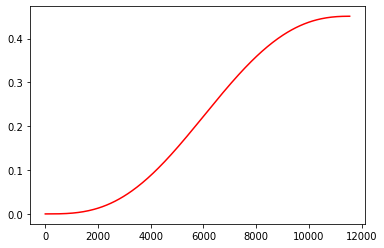

In [17]:
#sagert hydros
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import pi

def hydros(state,r):
    R0=1.477
    beta=1.78762405050753e+39
    eden=eos(state[0])
    g0 = -R0*eden*state[1]/r**2
    g1 = 4.*pi*r**2*eden/beta
    return np.array([g0,g1])

def eos(P):
    K=3.77869203916965e-23
    return (P/K)**(3./5.)

P0=2.3e22
M0=0.

rStop=20000.0
N=500
r=np.linspace(0.1,rStop,N)
dr = rStop/float(N-1)

y = np.zeros([N,2])
y[0,0] = P0
y[0,1] = M0

for j in range(N-1):
    y[j+1] = rungkutta4(y[j],r[j],dr,hydros)
plt.plot(r,y[:,1],color='red')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


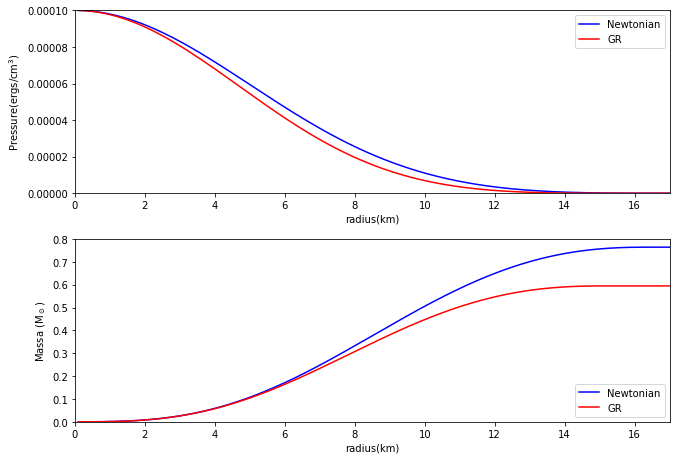

In [40]:
#non-relativistic neutron star
#constant
from scipy.constants import pi,G,c,hbar,m_n

m_N=1.66e-27
Msun=1.989e30 #kilogram
k0=(3.*pi**2/(m_n*c**2))**(5./3.)
knr=hbar**2*k0/(15.*m_n*pi**2)/(10.0**(2/3))
gnr=5./3.
B=Msun*c**2
R0=G*Msun/(1.0e3*c**2)

def convert(eps0):
    return eps0*1.0e9/1.78762405050753e+47

def eps(a,K,gamma):
    f=((R0/a)**gamma/K)**(1./(gamma-1))
    f1=convert(f/10)
    return f1

def bet(e0):
    return 4*pi*e0

def kbar(K,gamma):
    e0=1.6268782212048284e+38
    return K*e0**(gamma-1)

y1=eps(1.,knr,gnr)
y2=bet(y1)
y3=kbar(knr,gnr)

#eos defined hydros relativistic
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def eos(P):
    K=kbar(knr,gnr)
    if P<=0:
        P=1.0e-20
    return (P/K)**(3./5.)

def hydros(state,r):
    beta=y2
    eden=eos(state[0])
    one=-R0*eden*state[1]/r**2
    two=beta*r**2*eden
    return np.array([one,two])

def tov(state,r):
    beta=bet(y1)
    eden=eos(state[0])
    one=-R0*eden*state[1]*(1+(state[0]/eden))*(1 + beta*(state[0]/state[1])*r**3)/(r**2-2.*R0*state[1]*r)
    two=beta*r**2*eden
    return np.array([one,two])

def hsolve(P0,rStop,N):
    dr = rStop/float(N-1)
    beta=y2
    eden=eos(P0)
    yh = np.zeros([N,2])
    yh[0,0] = P0
    yh[0,1] = beta*dr**3*eden/3.
    yt = np.zeros([N,2])
    yt[0,0] = P0
    yt[0,1] = beta*dr**3*eden/3.
    
    
    r=np.linspace(0.1,rStop,N)
    
    for j in range(N-1):
        yh[j+1] = rungkutta4(yh[j],r[j],dr,hydros)
        yt[j+1] = rungkutta4(yt[j],r[j],dr,tov)
    return r, yh[:,0], yh[:,1], yt[:,0], yt[:,1]

ans=hsolve(1.0e-4,30,500)

fig=plt.figure(figsize=(9.5,6.5))
ax1=fig.add_subplot(211)
ax1.plot(ans[0],ans[1],color='blue',label='Newtonian')
ax1.plot(ans[0],ans[3],color='red',label='GR') #GR
ax1.set_xlabel('radius(km)')
ax1.set_ylabel(r'Pressure(ergs/cm$^3$)')
ax1.legend(loc='upper right')
ax1.set_xlim(0,17)
ax1.set_ylim(0,1.0e-4)

ax2=fig.add_subplot(212)
ax2.plot(ans[0],ans[2],color='blue',label='Newtonian')
ax2.plot(ans[0],ans[4],color='red',label='GR')
ax2.set_xlabel('radius(km)')
ax2.set_ylabel(r'Massa (M$_\odot$)')
ax2.legend(loc='lower right')
ax2.set_xlim(0,17)
ax2.set_ylim(0,0.8)

fig.tight_layout()
#fig.savefig('nonrel(1e-4).png')
fig.show()

In [44]:
#non-relativistic neutron star
#constant
from scipy.constants import pi,G,c,hbar,m_n

m_N=1.66e-27
Msun=1.989e30 #kilogram
k0=(3.*pi**2/(m_n*c**2))**(5./3.)
knr=hbar**2*k0/(15.*m_n*pi**2)/(10.0**(2/3))
gnr=5./3.
B=Msun*c**2
R0=G*Msun/(1.0e3*c**2)

def convert(eps0):
    return eps0*1.0e9/1.78762405050753e+47

def eps(a,K,gamma):
    f=((R0/a)**gamma/K)**(1./(gamma-1))
    f1=convert(f/10)
    return f1

def bet(e0):
    return 4*pi*e0

def kbar(K,gamma):
    e0=1.6268782212048284e+38 #nilai saat func eps return f saat a=1
    return K*e0**(gamma-1)

y1=eps(1.,knr,gnr)
y2=bet(y1)
y3=kbar(knr,gnr)

#eos defined hydros relativistic
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def eos(P):
    K=kbar(knr,gnr)
    if P<=0:
        P=1.0e-20
    return (P/K)**(3./5.)

def hydros(state,r):
    beta=y2
    eden=eos(state[0])
    one=-R0*eden*state[1]/r**2
    two=beta*r**2*eden
    return np.array([one,two])

def tov(state,r):
    beta=bet(y1)
    eden=eos(state[0])
    one=-R0*eden*state[1]*(1+(state[0]/eden))*(1 + beta*(state[0]/state[1])*r**3)/(r**2-2.*R0*state[1]*r)
    two=beta*r**2*eden
    return np.array([one,two])

def solve(P0,rStop,N):
    dr = rStop/float(N-1)
    beta=y2
    eden=eos(P0)
    yh = np.zeros([N,2])
    yh[0,0] = P0
    yh[0,1] = beta*dr**3*eden/3.
    yt = np.zeros([N,2])
    yt[0,0] = P0
    yt[0,1] = beta*dr**3*eden/3.
    r=np.linspace(0.1,rStop,N)
    for j in range(N-1):
        yh[j+1] = rungkutta4(yh[j],r[j],dr,hydros)
        yt[j+1] = rungkutta4(yt[j],r[j],dr,tov)
    rstar = 0. 
    mstar = 0.
    count = 0
    for i in yh[:,0]:
        if i>1.e-20:
            count = count + 1    
            rstar = rstar + dr
            mstar = yh[count,1]
    rstar2 = 0. 
    mstar2 = 0.
    count2 = 0
    for i in yt[:,0]:
        if i>1.e-20:
            count2 = count2 + 1    
            rstar2 = rstar2 + dr
            mstar2 = yt[count2,1]
    return rstar,mstar,rstar2,mstar2

ans2=solve(1.0e-4,30,500)
print("saat input alpha = 1 dan P(0) = 1.0e-5")
print("beta = {}".format(y2))
print("eps0 = {}".format(y1))
print("------Newtonian-------")
print("R = {}".format(ans2[0]))
print("M = {}".format(ans2[1]))
print("-------GR-------------")
print("R = {}".format(ans2[2]))
print("M = {}".format(ans2[3]))

saat input alpha = 1 dan P(0) = 1.0e-5
beta = 1.1436383766645435
eps0 = 0.0910078503778765
------Newtonian-------
R = 16.41282565130269
M = 0.7642704332108637
-------GR-------------
R = 15.150300601202476
M = 0.59472637026003


In [52]:
#neutron star eos combination 
#constant
from scipy.constants import pi,G,c,hbar,m_n

m_N=1.66e-27
Msun=1.989e30 #kilogram
k0=(3.*pi**2/(m_n*c**2))**(5./3.)
knr=hbar**2*k0/(15.*m_n*pi**2)/(10.0**(2/3))
gnr=5./3.
B=Msun*c**2
R0=G*Msun/(1.0e3*c**2)
ep0=m_n**4*c**5/(3.*pi**2*hbar**3)

def convert(eps0):
    return eps0*1.0e9/1.78762405050753e+47

def bet(e0):
    return 4*pi*e0

y1=convert(ep0)
y2=bet(y1)

#eos defined hydros relativistic
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def eos(P):
    # this is the fit to the non-interacting neutron matter pressure 
    anr = 2.53784142
    ar = 2.79036279
    if P<=0: 
        P=1.e-20
    return anr*P**(3./5.) + ar*P

def hydros(state,r):
    beta=y2
    eden=eos(state[0])
    one=-R0*eden*state[1]/r**2
    two=beta*r**2*eden
    return np.array([one,two])

def tov(state,r):
    beta=bet(y1)
    eden=eos(state[0])
    one=-R0*eden*state[1]*(1+(state[0]/eden))*(1 + beta*(state[0]/state[1])*r**3)/(r**2-2.*R0*state[1]*r)
    two=beta*r**2*eden
    return np.array([one,two])

def combsolve(P0,rStop,N):
    dr = rStop/float(N-1)
    beta=y2
    eden=eos(P0)
    yh = np.zeros([N,2])
    yh[0,0] = P0
    yh[0,1] = beta*dr**3*eden/3.
    yt = np.zeros([N,2])
    yt[0,0] = P0
    yt[0,1] = beta*dr**3*eden/3.
    r=np.linspace(0.1,rStop,N)
    for j in range(N-1):
        yh[j+1] = rungkutta4(yh[j],r[j],dr,hydros)
        yt[j+1] = rungkutta4(yt[j],r[j],dr,tov)
    rstar = 0. 
    mstar = 0.
    count = 0
    for i in yh[:,0]:
        if i>1.e-20:
            count = count + 1    
            rstar = rstar + dr
            mstar = yh[count,1]
    rstar2 = 0. 
    mstar2 = 0.
    count2 = 0
    for i in yt[:,0]:
        if i>1.e-20:
            count2 = count2 + 1    
            rstar2 = rstar2 + dr
            mstar2 = yt[count2,1]
    return rstar,mstar,rstar2,mstar2

def mass_radius(pmin,pmax): 
    imax = 30    
    pc = np.zeros(imax)
    mass = np.zeros(imax)
    radius = np.zeros(imax)
    mass2 = np.zeros(imax)
    radius2 = np.zeros(imax)
    for i in range(imax):
        pc[i] = pmin + (pmax-pmin)*i/30
        radius[i],mass[i],radius2[i],mass2[i] = combsolve(pc[i],40,500)
    return pc,radius,mass,radius2,mass2

ans6=combsolve(0.09,40,500)
print("saat input P(0) = 0.05")
print("beta = {}".format(y2))
print("eps0 = {}".format(y1))
print("------Newtonian-------")
print("R = {}".format(ans6[0]))
print("M = {}".format(ans6[1]))
print("-------GR-------------")
print("R = {}".format(ans6[2]))
print("M = {}".format(ans6[3]))

saat input P(0) = 0.05
beta = 0.03858084634376071
eps0 = 0.0030701662021391973
------Newtonian-------
R = 10.66132264529056
M = 1.397569408576054
-------GR-------------
R = 8.81763527054108
M = 0.7219050381927736


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


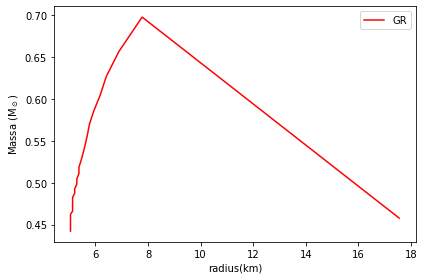

In [60]:
ans7=mass_radius(0.001,5.5) #GR effects

fig=plt.figure(figsize=(6,4))
plt.plot(ans7[3],ans7[4],color='red',label='GR')
plt.xlabel('radius(km)')
plt.ylabel(r'Massa (M$_\odot$)')
plt.legend(loc='upper right')
#plt.xlim(4,15)
#plt.ylim(0.5,0.9)

fig.tight_layout()
#fig.savefig('comb GR(M-R relation).png')
fig.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


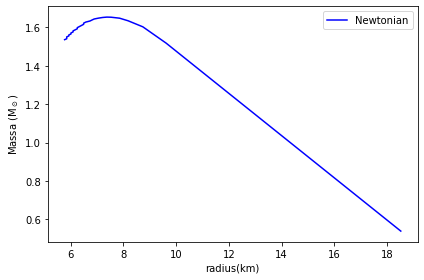

In [59]:
ans8=mass_radius(0.01,1.5)

fig=plt.figure(figsize=(6,4))
plt.plot(ans7[1],ans7[2],color='blue',label='Newtonian')
plt.xlabel('radius(km)')
plt.ylabel(r'Massa (M$_\odot$)')
plt.legend(loc='upper right')
#plt.xlim(6,17)
#plt.ylim(1,2)

fig.tight_layout()
#fig.savefig('comb Newt(M-R relation).png')
fig.show()